In [0]:
from google.colab import drive


In [0]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd ..

/


In [0]:
cd Clustring_dataset/

/gdrive/My Drive/Clustring_dataset


In [0]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [0]:
import pandas as pd
cust_df = pd.read_csv("Mall_Customers.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


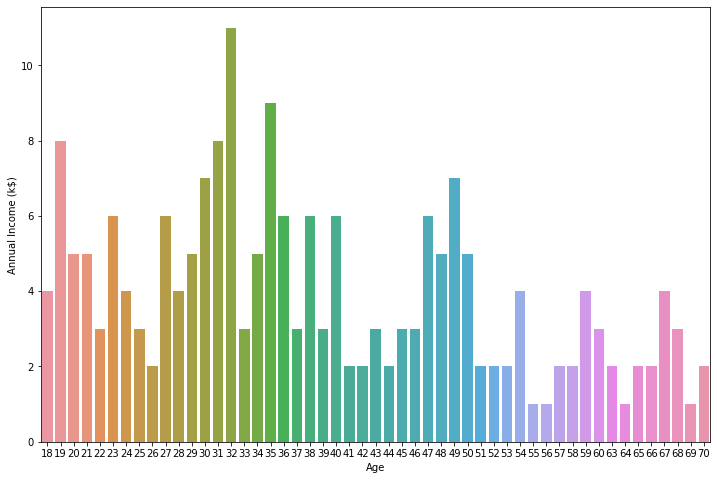

In [0]:
import seaborn as sns
df_grpd = cust_df.groupby("Age").count().reset_index()

fig = plt.figure(figsize=(12, 8))
sns.barplot(x="Age", y="Annual Income (k$)", data=df_grpd)

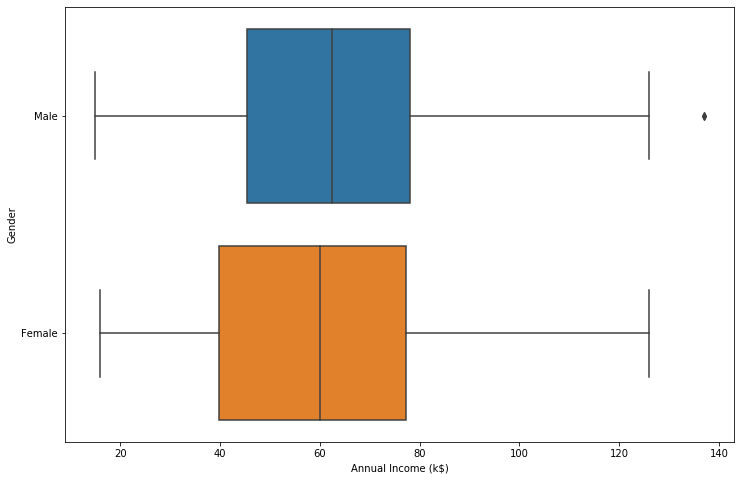

In [0]:
cust_df.boxplot(column="Test_1", vert=False) 

(0.0, 40.0)

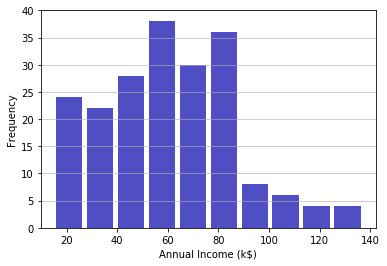

In [0]:
n, bins, patches = plt.hist(x=cust_df["Annual Income (k$)"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

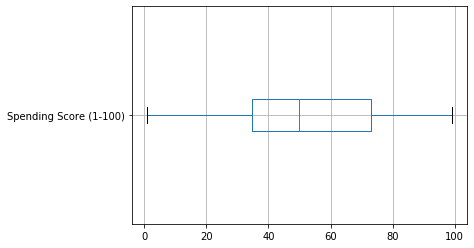

In [0]:
cust_df.boxplot(column="Spending Score (1-100)",vert=False)

In [0]:
X= cust_df.values[:, 2:]
from sklearn.preprocessing import StandardScaler

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

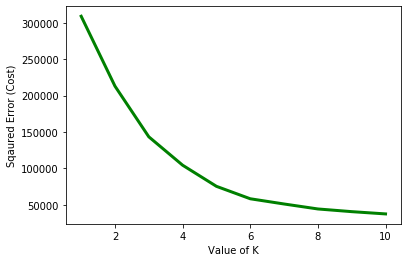

In [0]:
from matplotlib import style 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
    cost.append(KM.inertia_)      
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [0]:
optimalK = 5
k_means = KMeans(init = "k-means++", n_clusters = optimalK, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [0]:
cust_df["Clus_km"] = labels
cust_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
5,6,Female,22,17,76,4
6,7,Female,35,18,6,0
7,8,Female,23,18,94,4
8,9,Male,64,19,3,0
9,10,Female,30,19,72,4


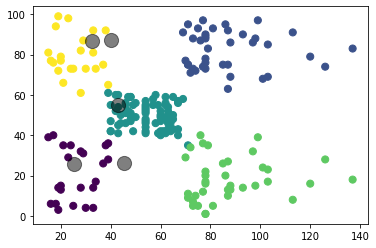

In [0]:
y_kmeans = k_means.predict(X)
plt.scatter( X[:, 1],X[:,2], c=y_kmeans, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
